In [1]:
import pandas as pd
import math
satc_all_lines_w_rating = pd.read_csv("satc_all_lines_w_rating.csv").drop(["Unnamed: 0"],axis=1)
satc_all_lines_w_rating['S_E'] = satc_all_lines_w_rating['Season'].astype(int).astype(str)+"_"+satc_all_lines_w_rating['Episode'].astype(int).astype(str)
satc_all_lines_w_rating.head()

,Season,Episode,Speaker,Line,date_job,ep_data_name,ep_data_url,ID,Rating,S_E
0,1,1,Carrie,"Once upon a time, an English journalist came t...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
1,1,1,Carrie,Elizabeth was attractive and bright.,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
2,1,1,Carrie,Right away she hooked up with one of the city'...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
3,1,1,Tim,The question remains-- Is this really a compan...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1
4,1,1,Carrie,"Tim was 42, a well-liked and respected investm...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1


To dos: 
+ Group all lines of same season + episode together
+ preprocess the text, tokenization, remove stopwords 

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


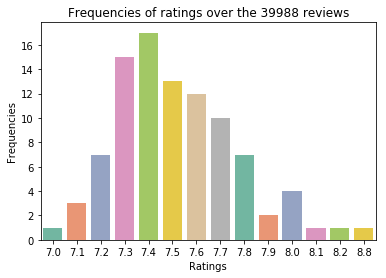

In [2]:
# Distribution of Ratings
import seaborn as sns 
import matplotlib.pyplot as plt

# Plotting rating distribution
X_ratings = satc_all_lines_w_rating.groupby(['S_E']).min().Rating.value_counts()
x = sns.barplot(X_ratings.index,X_ratings,palette="Set2")
x.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(satc_all_lines_w_rating.shape[0]))
plt.show()
#X_ratings


In [3]:
#text transformation

satc_all_lines_w_rating["cleaned"] = satc_all_lines_w_rating.Line.tolist()
#all to lowercase 
satc_all_lines_w_rating.cleaned = [str(line).lower() for line in satc_all_lines_w_rating.cleaned]

#remove special chars
chars_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
trans_dict = {initial:" " for initial in chars_remove}
satc_all_lines_w_rating.cleaned = [line.translate(str.maketrans(trans_dict)) for line in satc_all_lines_w_rating.cleaned]
satc_all_lines_w_rating.head()

,Season,Episode,Speaker,Line,date_job,ep_data_name,ep_data_url,ID,Rating,S_E,cleaned
0,1,1,Carrie,"Once upon a time, an English journalist came t...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,once upon a time an english journalist came t...
1,1,1,Carrie,Elizabeth was attractive and bright.,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,elizabeth was attractive and bright
2,1,1,Carrie,Right away she hooked up with one of the city'...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,right away she hooked up with one of the city ...
3,1,1,Tim,The question remains-- Is this really a compan...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,the question remains is this really a compan...
4,1,1,Carrie,"Tim was 42, a well-liked and respected investm...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,tim was 42 a well liked and respected investm...


In [4]:
#Tokenization
# NLP library imports

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dorar_000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dorar_000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dorar_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#We are using NLKT tokenizer to split all text up into individual tokens
#we can try different tokenizer here 
satc_all_lines_w_rating["tokenized"] = [word_tokenize(line) for line in satc_all_lines_w_rating.cleaned]

#Removing stopwords for topic extraction using nltk stopwords library
stopw = stopwords.words('english')
satc_all_lines_w_rating["w_o_stopwords"] = [[token for token in line if token not in stopw] for line in satc_all_lines_w_rating.tokenized]
satc_all_lines_w_rating.head()

,Season,Episode,Speaker,Line,date_job,ep_data_name,ep_data_url,ID,Rating,S_E,cleaned,tokenized,w_o_stopwords
0,1,1,Carrie,"Once upon a time, an English journalist came t...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,once upon a time an english journalist came t...,"[once, upon, a, time, an, english, journalist,...","[upon, time, english, journalist, came, new, y..."
1,1,1,Carrie,Elizabeth was attractive and bright.,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,elizabeth was attractive and bright,"[elizabeth, was, attractive, and, bright]","[elizabeth, attractive, bright]"
2,1,1,Carrie,Right away she hooked up with one of the city'...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,right away she hooked up with one of the city ...,"[right, away, she, hooked, up, with, one, of, ...","[right, away, hooked, one, city, typically, el..."
3,1,1,Tim,The question remains-- Is this really a compan...,NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,the question remains is this really a compan...,"[the, question, remains, is, this, really, a, ...","[question, remains, really, company, want]"
4,1,1,Carrie,"Tim was 42, a well-liked and respected investm...",NaN,Sex and the City,https://www.imdb.com/title/tt0698663/?ref_=tte...,698663,7.4,1_1,tim was 42 a well liked and respected investm...,"[tim, was, 42, a, well, liked, and, respected,...","[tim, 42, well, liked, respected, investment, ..."


20

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


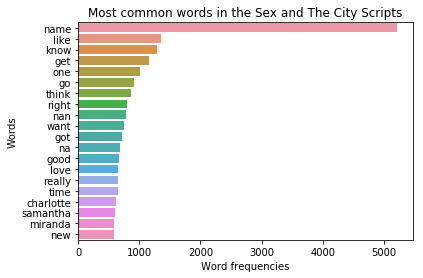

In [17]:
import numpy as np
#visualisation of the words
all_words = []
for line in satc_all_lines_w_rating["w_o_stopwords"]:
    for word in line:
        all_words.append(word)

dist = nltk.FreqDist(all_words)
X = [nb[1] for nb in dist.most_common(20)]
y = [nb[0] for nb in dist.most_common(20)]
x = sns.barplot(np.array(X),np.array(y))
x.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the Sex and The City Scripts')
plt.show()


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


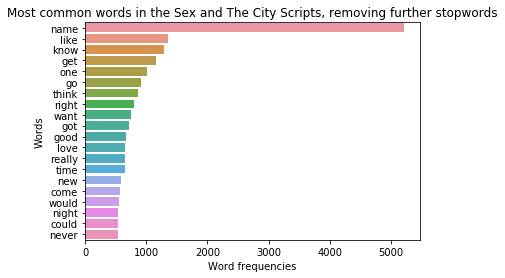

In [19]:

#adding oh, nan and na to the list of stopwords, as well as the names of the main characters
main_chars = ["charlotte","samantha","carrie","miranda"]
new_stopw = stopw + ["oh","nan","na"] + main_chars
satc_all_lines_w_rating["w_o_stopwords_2"] = [[token for token in line if token not in new_stopw] for line in satc_all_lines_w_rating.tokenized]


all_words = []
for line in satc_all_lines_w_rating["w_o_stopwords_2"]:
    for word in line:
        all_words.append(word)

dist = nltk.FreqDist(all_words)
X = [nb[1] for nb in dist.most_common(20)]
y = [nb[0] for nb in dist.most_common(20)]
x = sns.barplot(np.array(X),np.array(y))
x.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the Sex and The City Scripts, removing further stopwords')
plt.show()

In [ ]:
#saving tokenized data set
satc_all_lines_w_rating.to_csv("satc_all_lines_w_rating_tokenized.csv")

# Lemmatization

In [ ]:
# apply lemmatization from wordnet in order to merge words that come from the same meaning .- for example, "friend" and "friends" should be counted as the same word

def lemmatize(tokens):
    tokens = [WordNetLemmatizer().lemmatize(WordNetLemmatizer().lemmatize(WordNetLemmatizer().lemmatize(token,pos='a'),pos='v'),pos='n') for token in tokens]
    return tokens  

satc_all_lines_w_rating["lemmatized"] = [lemmatize(line) for line in satc_all_lines_w_rating.w_o_stopwords_2]

In [ ]:
#look at the difference in words 
print(satc_all_lines_w_rating.w_o_stopwords_2[0:10])
print(satc_all_lines_w_rating.lemmatized[0:10])

In [ ]:
all_words = []
for line in satc_all_lines_w_rating["lemmatized"]:
    for word in line:
        all_words.append(word)

dist = nltk.FreqDist(all_words)
X = [nb[1] for nb in dist.most_common(20)]
y = [nb[0] for nb in dist.most_common(20)]
x = sns.barplot(X,y)
x.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the Sex and The City Scripts, Lemmatized')
plt.show()

# TF-IDF Matrix  
in order to highlight words specific to an episode

In [ ]:
#group by episode to define one episode as one document for tf-idf
initial_season = 1.0
inital_episode = 1.0 
all_lines = []
for index, row in satc_all_lines_w_rating.iterrows():
    if (row.Season == initial_season)&(row.Episode == inital_episode):
        all_lines.append(row.lemmatized)
    
flat_all_lines = [word for line in all_lines for word in line]
#flat_all_lines
